In [1]:
# lets import the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# load the data set

In [4]:
data=pd.read_csv(r"Oasis infobytes\CarPrice_Assignment.csv")

In [5]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
# lets descibe the data

In [7]:
data.shape

(205, 26)

In [8]:
data.describe().style.background_gradient()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [9]:
data.describe(include='object')

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


In [10]:
# lets check the is any null point is present in data

In [11]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [12]:
data.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [13]:
data["CarName"].value_counts()

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64

In [14]:
# lets plot the data

array([[<Axes: title={'center': 'car_ID'}>,
        <Axes: title={'center': 'symboling'}>,
        <Axes: title={'center': 'wheelbase'}>,
        <Axes: title={'center': 'carlength'}>],
       [<Axes: title={'center': 'carwidth'}>,
        <Axes: title={'center': 'carheight'}>,
        <Axes: title={'center': 'curbweight'}>,
        <Axes: title={'center': 'enginesize'}>],
       [<Axes: title={'center': 'boreratio'}>,
        <Axes: title={'center': 'stroke'}>,
        <Axes: title={'center': 'compressionratio'}>,
        <Axes: title={'center': 'horsepower'}>],
       [<Axes: title={'center': 'peakrpm'}>,
        <Axes: title={'center': 'citympg'}>,
        <Axes: title={'center': 'highwaympg'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

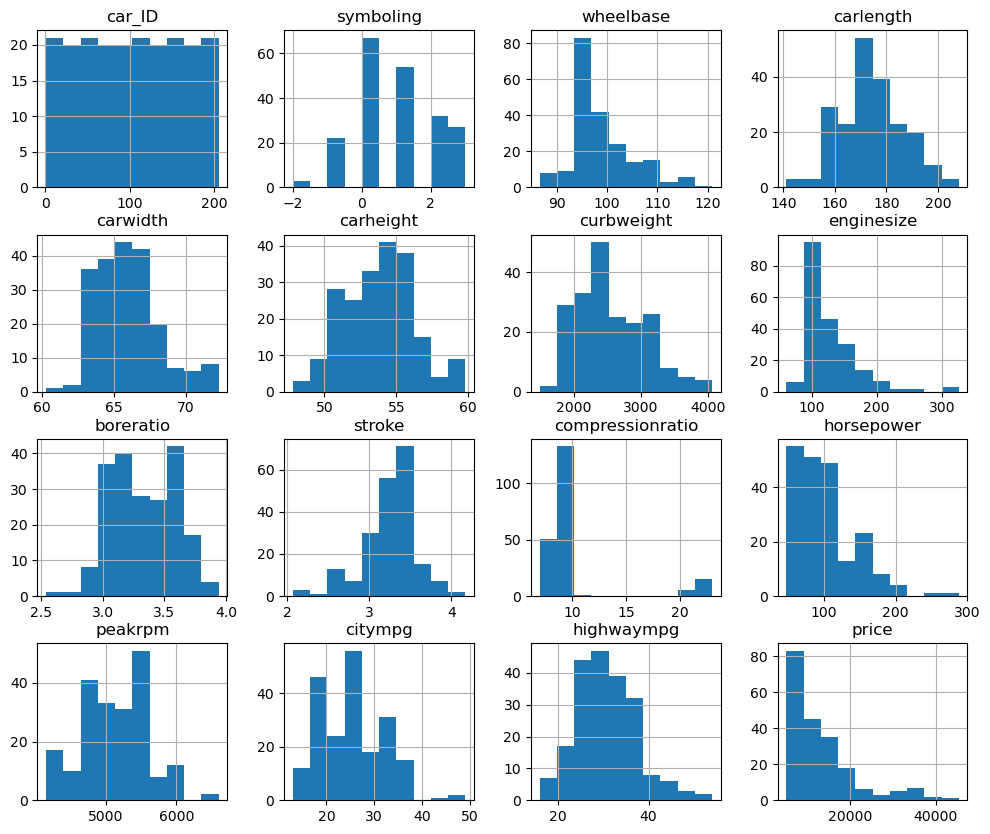

In [15]:
plt.rcParams["figure.figsize"]=(12,10)
data.hist()

In [16]:
data["fueltype"].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

([<matplotlib.patches.Wedge at 0x27e4b540f70>,
 [Text(-1.048736003975903, 0.3318927446701041, 'gas'),
  Text(1.144075606802026, -0.36206491948347685, 'diesel')])

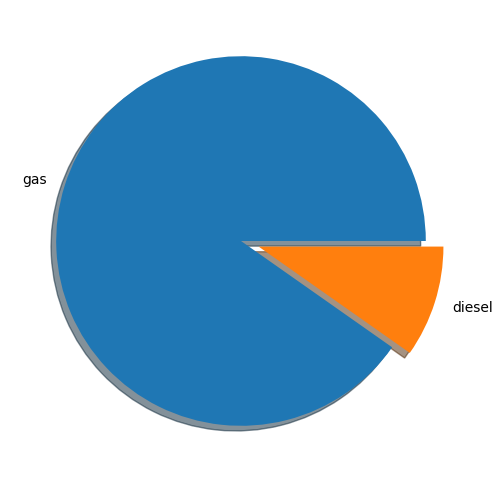

In [17]:
plt.rcParams["figure.figsize"]=(8,6)
plt.pie(data["fueltype"].value_counts(),labels=data["fueltype"].value_counts().index,explode=[0,0.1],shadow=True)

In [18]:
# lets check the correlation with help of heatmap

In [19]:
# lets encode the data


In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
def encode(df):
    for i in df.columns:
        if df[i].dtypes=="object":
            df[i]=le.fit_transform(data[i])
    return df
data=encode(data)

<Axes: >

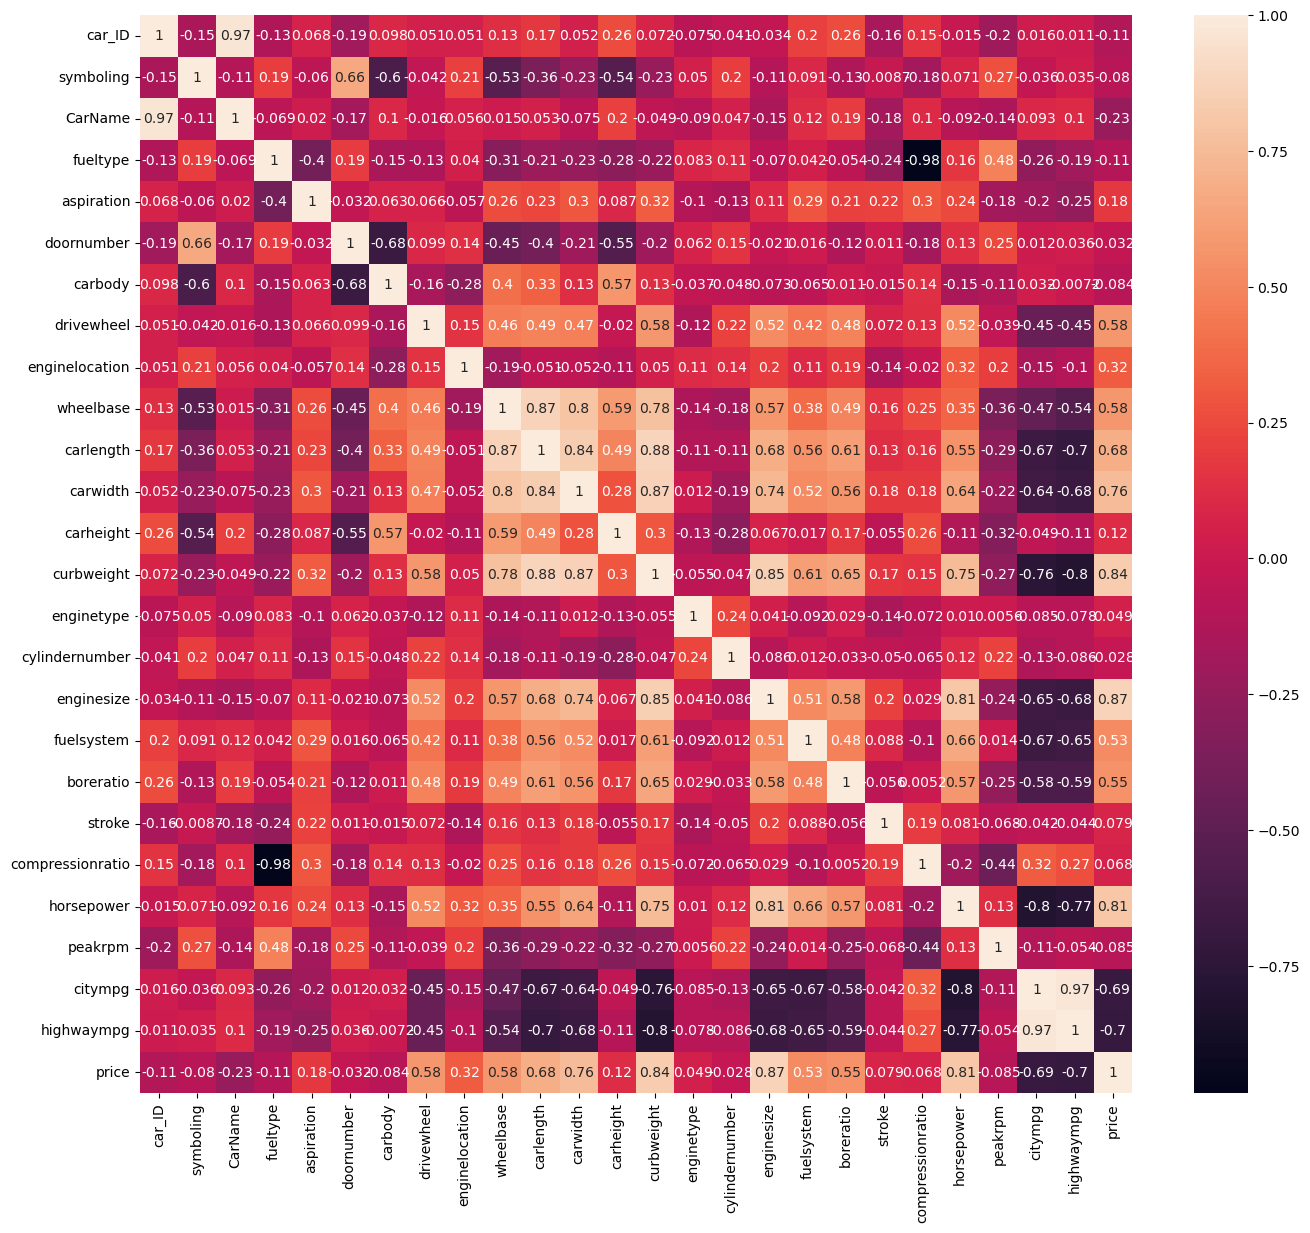

In [21]:
plt.rcParams["figure.figsize"]=(16,14)
index=data.corr().index
sns.heatmap(data[index].corr(),annot=True)

In [22]:
data=data.drop(["car_ID","CarName","carheight","aspiration","carbody","symboling","doornumber","cylindernumber","enginesize","enginetype","stroke","compressionratio","peakrpm","citympg","highwaympg"],axis=1)

In [23]:
data["enginelocation"].value_counts()

0    202
1      3
Name: enginelocation, dtype: int64

In [24]:
# most of the car have enginelocation  at front only 3 cars have enginelocation at back so drop that column

In [25]:
data=data.drop(["enginelocation"],axis=1)

In [26]:
data["drivewheel"].value_counts()

1    120
2     76
0      9
Name: drivewheel, dtype: int64

In [27]:
# lets check skewness of the data

In [28]:
data.skew()

fueltype     -2.732619
drivewheel   -0.058352
wheelbase     1.050214
carlength     0.155954
carwidth      0.904003
curbweight    0.681398
fuelsystem   -0.242995
boreratio     0.020156
horsepower    1.405310
price         1.777678
dtype: float64

In [29]:
data["fueltype"].value_counts()

1    185
0     20
Name: fueltype, dtype: int64

In [30]:
# lets remove the skewness from data


In [31]:
feature=data.iloc[:,:-1]
target=data.iloc[:,-1]

In [32]:
from sklearn.preprocessing import power_transform
def skew(df):
    array=power_transform(df,method="yeo-johnson")
    new=pd.DataFrame(array,columns=df.columns)
    return new

In [33]:
feature=skew(feature)

In [34]:
new_data=pd.concat([feature,target],axis=1)

In [35]:
new_data.skew()

fueltype     -2.732619
drivewheel   -0.042049
wheelbase    -0.003485
carlength    -0.000424
carwidth      0.000000
curbweight    0.024871
fuelsystem   -0.283673
boreratio    -0.011526
horsepower    0.049318
price         1.777678
dtype: float64

In [36]:
# lets find outliars

<Axes: >

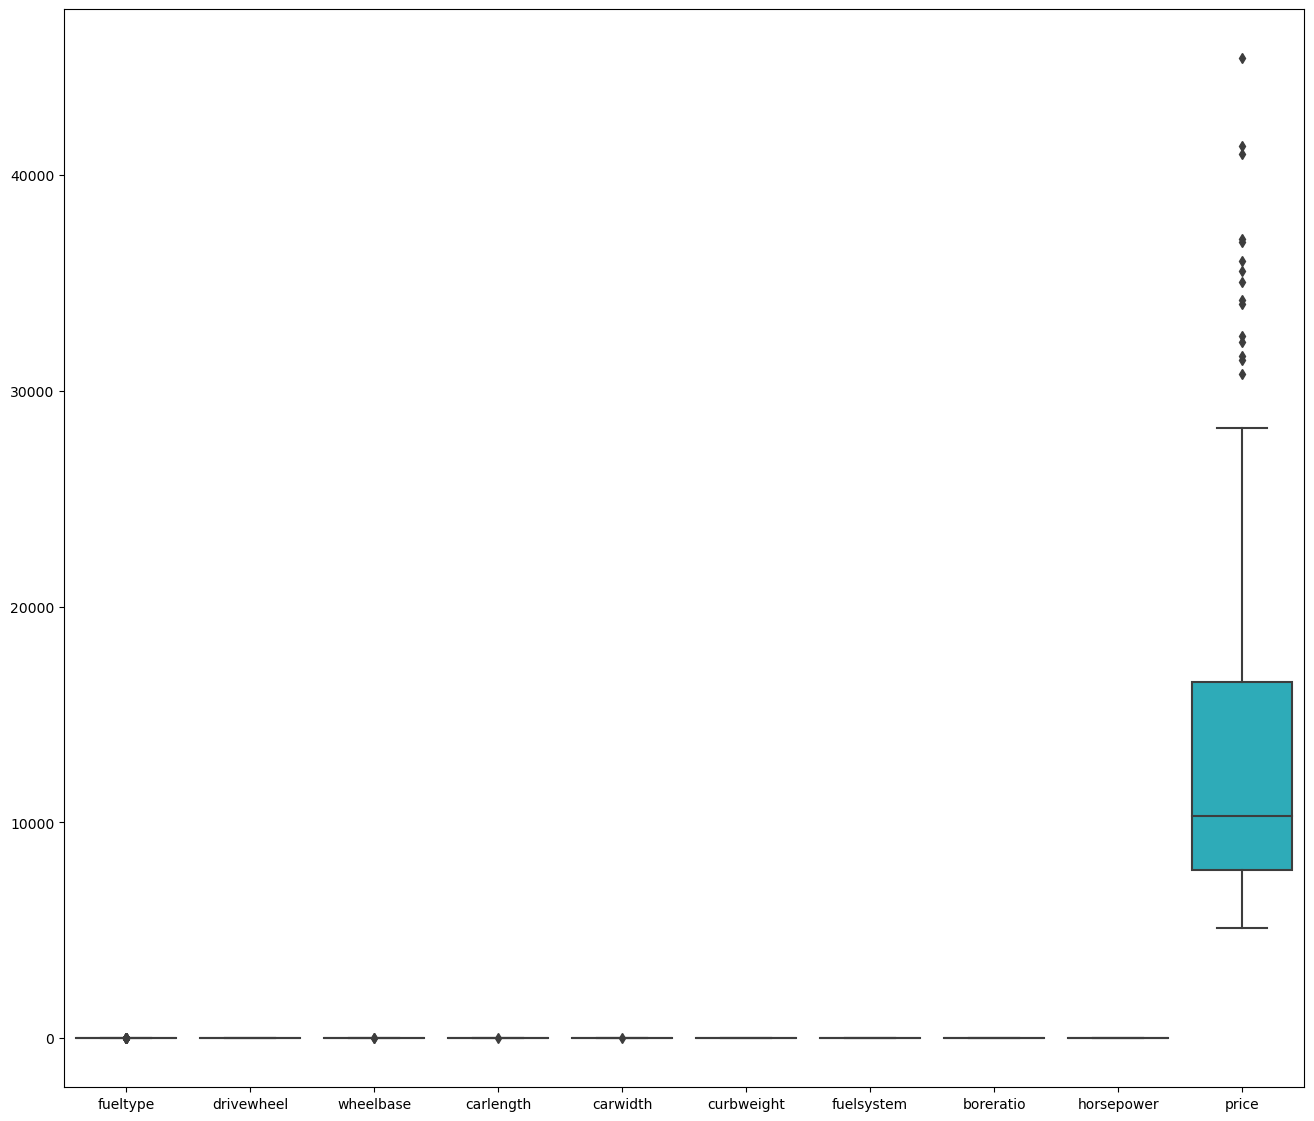

In [37]:
sns.boxplot(new_data)

In [38]:
# lets remove outliars

In [39]:
from scipy.stats import zscore
threshold=3
z=np.abs(zscore(new_data))
np.where(z>3)

(array([ 16,  18,  18,  30,  31,  63,  66,  67,  68,  69,  70,  73,  74,
         90, 108, 110, 112, 114, 116, 158, 159, 174, 182, 184, 187, 192,
        203], dtype=int64),
 array([9, 4, 5, 2, 2, 0, 0, 0, 0, 0, 0, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0], dtype=int64))

In [40]:
data=new_data[(z<3).all(axis=1)]

In [41]:
data

,fueltype,drivewheel,wheelbase,carlength,carwidth,curbweight,fuelsystem,boreratio,horsepower,price
0,0.328798,1.215572,-2.402418,-0.404369,-6.661338e-16,0.144823,0.868597,0.525135,0.466122,13495.0
1,0.328798,1.215572,-2.402418,-0.404369,-6.661338e-16,0.144823,0.868597,0.525135,0.466122,16500.0
2,0.328798,1.215572,-0.699849,-0.205730,-2.775558e-17,0.647098,0.868597,-2.448083,1.286257,16500.0
3,0.328798,-0.591931,0.365001,0.233459,2.220446e-16,-0.303501,0.868597,-0.510857,0.226519,13950.0
4,0.328798,-2.372420,0.296266,0.233459,3.053113e-16,0.648780,0.868597,-0.510857,0.562854,17450.0
...,...,...,...,...,...,...,...,...,...,...
199,0.328798,1.215572,1.034563,1.188740,5.828671e-16,1.160955,0.868597,1.072818,1.399154,18950.0
200,0.328798,1.215572,1.579616,1.188740,1.082467e-15,0.856578,0.868597,1.651693,0.539182,16845.0
201,0.328798,1.215572,1.579616,1.188740,1.054712e-15,1.004682,0.868597,1.651693,1.371783,19045.0
202,0.328798,1.215572,1.579616,1.188740,1.082467e-15,0.949090,0.868597,0.927249,0.957615,21485.0


In [42]:
# lets  split the data

In [43]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.33,shuffle=True)


In [44]:
# lets scale data

In [45]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [46]:
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [47]:
# lets build the model

In [48]:
from sklearn.ensemble import GradientBoostingRegressor  

In [49]:
gbr=GradientBoostingRegressor(loss='squared_error',n_estimators=40,criterion='squared_error')

In [50]:
model=gbr.fit(x_train,y_train)

In [51]:
# lets check accuracy of training data

In [52]:
from sklearn.metrics import r2_score

In [53]:
pred1=model.predict(x_train)

In [54]:
print("accuracy of training data is : ",r2_score(y_train,pred1)*100)

accuracy of training data is :  98.42074300724101


In [55]:
# lets check accuracy of testing data 

In [56]:
pred2=model.predict(x_test)

In [57]:
print("accuracy of testing data is : ",r2_score(y_test,pred2)*100)

accuracy of testing data is :  86.36253797193952


In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
ln=LinearRegression()

In [60]:
ml=ln.fit(x_train,y_train)

In [61]:
pre=ln.predict(x_train)

In [62]:
print(r2_score(y_train,pre)*100)

73.65302928734584


In [63]:
pre2=ln.predict(x_test)

In [64]:
print(r2_score(y_test,pre2)*100)

69.17253421350466


In [65]:
# from above we can say that linear model is best fit model so dump model with pickle library

In [66]:
import pickle 
with open("price_predict.pkl","wb")as file_data:
    pickle.dump(ln,file_data)